In [1]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

!pip install Pillow==8.4

import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw


from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person


import matplotlib.pyplot as plt

In [2]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()
    
def show_image_object_in_cell(image_object):
    plt.figure(figsize=(20,10))
    plt.imshow(image_object)
    plt.show()

# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width= 10)
    return img

In [3]:
KEY = "004c79af87ba4003a53d692a0dfc0f46"
ENDPOINT = "https://dungdofacecognitiveservice.cognitiveservices.azure.com/"
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))
face_client.api_version

'1.0'

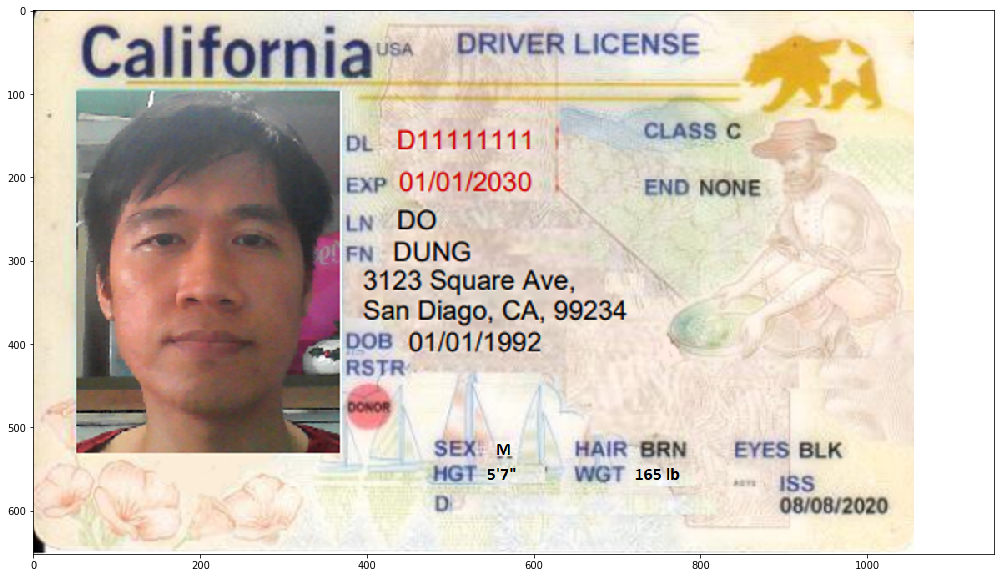

In [4]:
single_face = "https://raw.githubusercontent.com/dongocdung1989/Project1AutoKios/main/digital_id_DungDo.PNG"
show_image_in_cell(single_face)
selected_image = single_face

In [5]:
# Detect Face form an image
def detect_face_from_any_url(selected_image):
    detected_faces = face_client.face.detect_with_url(url=selected_image, detection_model='detection_03')
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(single_image_name))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

In [6]:
def list_all_faces_from_detected_face_object(detected_faces_object):
    print('We found total {} face(s) in selected face detected object.'.format(str(len(detected_faces_object))))
    for face in detected_faces_object: 
        print (face.face_id)

Total face(s) detected  from 1
We found total 1 face(s) in selected face detected object.
a50a124e-e26e-4465-8fee-d6c7e2d0817c


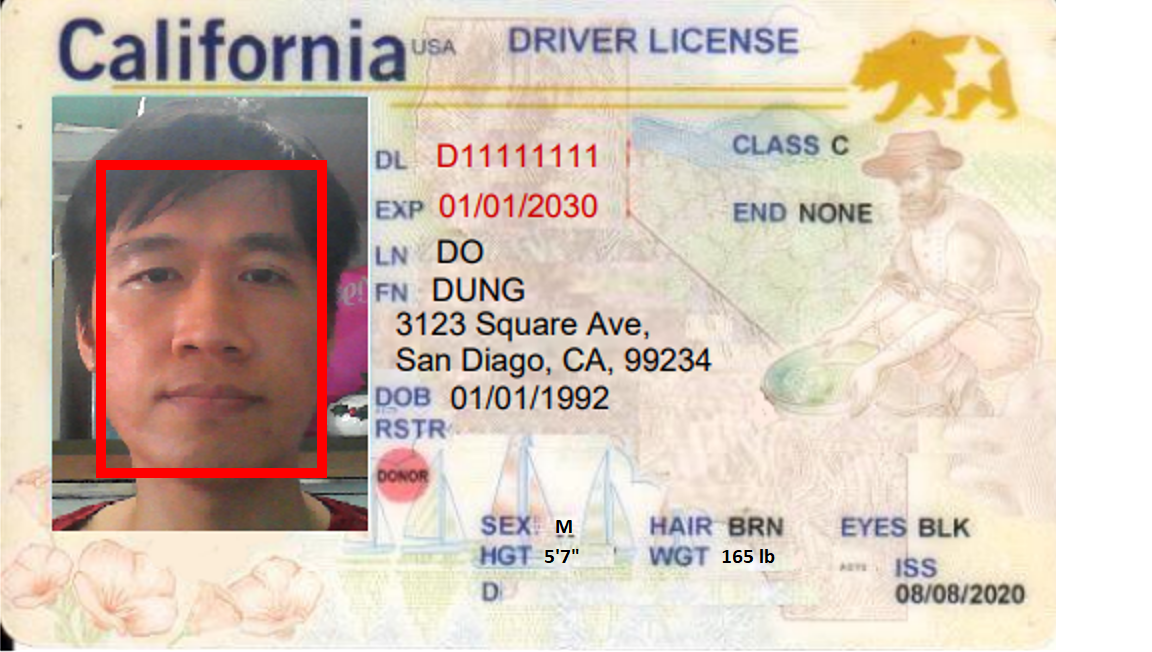

In [7]:
detected_faces_object = detect_face_from_any_url(single_face)
list_all_faces_from_detected_face_object(detected_faces_object)
drawFaceRectangles(single_face, detected_faces_object)